# Imports

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import math
import csv
import matplotlib.pyplot as plt
import seaborn as sns

# Data Read and Cleanup

In [2]:
# Read in full Motor Vehicle Collision Dataset
mvc_df = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes.csv")

C:\Users\pawan\AppData\Local\Temp\ipykernel_1348\3333524029.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  mvc_df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')


In [3]:
# Output column names
mvc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026647 entries, 0 to 2026646
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [4]:
# Use DropNA to clean
mvc_df_cleaned = mvc_df.dropna(
    axis="index",
    how="any",
    subset=[  #'CRASH DATE',
        #'CRASH TIME',
        "BOROUGH"
        #'ZIP CODE',
        #'LOCATION',
        #'CROSS STREET NAME',
        #'NUMBER OF PERSONS INJURED',
        #'NUMBER OF PERSONS KILLED',
        #'NUMBER OF PEDESTRIANS INJURED',
        #'NUMBER OF PEDESTRIANS KILLED',
        #'NUMBER OF MOTORIST INJURED',
        #'NUMBER OF MOTORIST KILLED',
        #'CONTRIBUTING FACTOR VEHICLE 1',
        #'VEHICLE TYPE CODE 1'
    ],
)
print(f"Num entries: {len(mvc_df_cleaned)}")

Num entries: 1396206


In [5]:
# Strip/Trim the columns
mvc_df_cleaned.replace("(^\s+|\s+$)", "", regex=True, inplace=True)

# mvc_df_cleaned = mvc_df_cleaned.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\pawan\AppData\Local\Temp\ipykernel_1348\2893477256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvc_df_cleaned.replace('(^\s+|\s+$)', '', regex=True, inplace=True)


In [6]:
# Convert Dates and Times
from datetime import datetime

date_format = "%m/%d/%Y"
time_format = "%H:%M"

mvc_df_cleaned["CRASH DATE"] = pd.to_datetime(mvc_df_cleaned["CRASH DATE"])
mvc_df_cleaned["DAY OF WEEK"] = mvc_df_cleaned["CRASH DATE"].dt.day_of_week

mvc_df_cleaned["CRASH TIME"] = pd.to_datetime(mvc_df_cleaned["CRASH TIME"])

display(mvc_df_cleaned.info())
display(mvc_df_cleaned.head())

C:\Users\pawan\AppData\Local\Temp\ipykernel_1348\1484727060.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvc_df_cleaned['CRASH DATE'] = pd.to_datetime(mvc_df_cleaned['CRASH DATE'])
C:\Users\pawan\AppData\Local\Temp\ipykernel_1348\1484727060.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvc_df_cleaned['DAY OF WEEK'] = mvc_df_cleaned['CRASH DATE'].dt.day_of_week
C:\Users\pawan\AppData\Local\Temp\ipykernel_1348\1484727060.py:9: UserWarning: Could not infer format, so each element will be parsed in

<class 'pandas.core.frame.DataFrame'>
Index: 1396206 entries, 3 to 2026646
Data columns (total 30 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   CRASH DATE                     1396206 non-null  datetime64[ns]
 1   CRASH TIME                     1396206 non-null  datetime64[ns]
 2   BOROUGH                        1396206 non-null  object        
 3   ZIP CODE                       1395966 non-null  object        
 4   LATITUDE                       1359808 non-null  float64       
 5   LONGITUDE                      1359808 non-null  float64       
 6   LOCATION                       1359808 non-null  object        
 7   ON STREET NAME                 1095362 non-null  object        
 8   CROSS STREET NAME              1094795 non-null  object        
 9   OFF STREET NAME                300283 non-null   object        
 10  NUMBER OF PERSONS INJURED      1396195 non-null  float64   

None

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,DAY OF WEEK
3,2021-09-11,2023-10-15 09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN,5
4,2021-12-14,2023-10-15 08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN,1
7,2021-12-14,2023-10-15 08:17:00,BRONX,10475.0,40.868160,-73.831480,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,...,NaN,NaN,NaN,4486660,Sedan,Sedan,NaN,NaN,NaN,1
8,2021-12-14,2023-10-15 21:10:00,BROOKLYN,11207.0,40.671720,-73.897100,"(40.67172, -73.8971)",NaN,NaN,2047 PITKIN AVENUE,...,NaN,NaN,NaN,4487074,Sedan,NaN,NaN,NaN,NaN,1
9,2021-12-14,2023-10-15 14:58:00,MANHATTAN,10017.0,40.751440,-73.973970,"(40.75144, -73.97397)",3 AVENUE,EAST 43 STREET,NaN,...,NaN,NaN,NaN,4486519,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,1


In [7]:
# Trying to extract time only and keep it as datetime object

MVC_Test = mvc_df_cleaned.copy()

MVC_Test["CRASH TIME"] = pd.to_datetime(
    MVC_Test["CRASH TIME"], format="%H:%M:%S"
).apply(pd.Timestamp)

In [8]:
# Replace the causation to tighter categories

causation_mapping_df = pd.read_csv("causation_factor_mapping_file.csv")


# Function to use for returning the category of a causation factor
def map_causation(cause, mapping_df):
    if pd.isna(cause) == True:
        return "Unknown"
    category = mapping_df[mapping_df["Causation Factor"] == cause]["Category"].values[0]
    return category


# Change Contributing Factor Vehicle to Categories of choice
mvc_df_cleaned["CONTRIBUTING FACTOR VEHICLE 1"] = mvc_df_cleaned[
    "CONTRIBUTING FACTOR VEHICLE 1"
].apply(lambda x: map_causation(x, causation_mapping_df))
mvc_df_cleaned["CONTRIBUTING FACTOR VEHICLE 2"] = mvc_df_cleaned[
    "CONTRIBUTING FACTOR VEHICLE 2"
].apply(lambda x: map_causation(x, causation_mapping_df))
mvc_df_cleaned["CONTRIBUTING FACTOR VEHICLE 3"] = mvc_df_cleaned[
    "CONTRIBUTING FACTOR VEHICLE 3"
].apply(lambda x: map_causation(x, causation_mapping_df))
mvc_df_cleaned["CONTRIBUTING FACTOR VEHICLE 4"] = mvc_df_cleaned[
    "CONTRIBUTING FACTOR VEHICLE 4"
].apply(lambda x: map_causation(x, causation_mapping_df))
mvc_df_cleaned["CONTRIBUTING FACTOR VEHICLE 5"] = mvc_df_cleaned[
    "CONTRIBUTING FACTOR VEHICLE 5"
].apply(lambda x: map_causation(x, causation_mapping_df))

C:\Users\pawan\AppData\Local\Temp\ipykernel_1348\4221139957.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvc_df_cleaned['CONTRIBUTING FACTOR VEHICLE 1'] =mvc_df_cleaned['CONTRIBUTING FACTOR VEHICLE 1'].apply(lambda x: map_causation(x, causation_mapping_df))
C:\Users\pawan\AppData\Local\Temp\ipykernel_1348\4221139957.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvc_df_cleaned['CONTRIBUTING FACTOR VEHICLE 2'] =mvc_df_cleaned['CONTRIBUTING FACTOR VEHICLE 2'].apply(lambda x: map_causation(x, cau

In [9]:
# Add HasDeath and HasInjury
mvc_df_cleaned["HAS DEATH"] = np.where(
    mvc_df_cleaned["NUMBER OF PERSONS KILLED"] > 0, 1, 0
)
mvc_df_cleaned["HAS INJURY"] = np.where(
    mvc_df_cleaned["NUMBER OF PERSONS INJURED"] > 0, 1, 0
)

C:\Users\pawan\AppData\Local\Temp\ipykernel_1348\2886650965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvc_df_cleaned['HAS DEATH'] = np.where(mvc_df_cleaned['NUMBER OF PERSONS KILLED'] > 0, 1, 0)
C:\Users\pawan\AppData\Local\Temp\ipykernel_1348\2886650965.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvc_df_cleaned['HAS INJURY'] = np.where(mvc_df_cleaned['NUMBER OF PERSONS INJURED'] > 0, 1, 0)


In [46]:
# Add Crash Hour and Crash Minute
mvc_df_cleaned["CRASH HOUR"] = mvc_df_cleaned["CRASH TIME"].dt.hour

C:\Users\pawan\AppData\Local\Temp\ipykernel_1348\3218113332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvc_df_cleaned['CRASH HOUR'] = mvc_df_cleaned['CRASH TIME'].dt.hour


# Copy the data and preserve original

In [47]:
# Make a copy so that original is preserved

MVC = mvc_df_cleaned.copy()
MVC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1396206 entries, 3 to 2026646
Data columns (total 33 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   CRASH DATE                     1396206 non-null  datetime64[ns]
 1   CRASH TIME                     1396206 non-null  datetime64[ns]
 2   BOROUGH                        1396206 non-null  object        
 3   ZIP CODE                       1395966 non-null  object        
 4   LATITUDE                       1359808 non-null  float64       
 5   LONGITUDE                      1359808 non-null  float64       
 6   LOCATION                       1359808 non-null  object        
 7   ON STREET NAME                 1095362 non-null  object        
 8   CROSS STREET NAME              1094795 non-null  object        
 9   OFF STREET NAME                300283 non-null   object        
 10  NUMBER OF PERSONS INJURED      1396195 non-null  float64   

# Special Constraints / Conditions Added Here

In [48]:
# Reduce scope to only 2018 and later for COVID focus

MVC = MVC[MVC["CRASH DATE"].dt.year >= 2018]


# Drop unknown cause category
MVC["CAUSE CATEGORY"] = MVC["CONTRIBUTING FACTOR VEHICLE 1"]
MVC = MVC[MVC["CAUSE CATEGORY"] != "Unknown"]

MVC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398581 entries, 8 to 2026645
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH DATE                     398581 non-null  datetime64[ns]
 1   CRASH TIME                     398581 non-null  datetime64[ns]
 2   BOROUGH                        398581 non-null  object        
 3   ZIP CODE                       398489 non-null  object        
 4   LATITUDE                       386998 non-null  float64       
 5   LONGITUDE                      386998 non-null  float64       
 6   LOCATION                       386998 non-null  object        
 7   ON STREET NAME                 260475 non-null  object        
 8   CROSS STREET NAME              260324 non-null  object        
 9   OFF STREET NAME                138105 non-null  object        
 10  NUMBER OF PERSONS INJURED      398581 non-null  float64       
 11  NUMB

# Real Work Starts Here!

<Axes: xlabel='BOROUGH'>

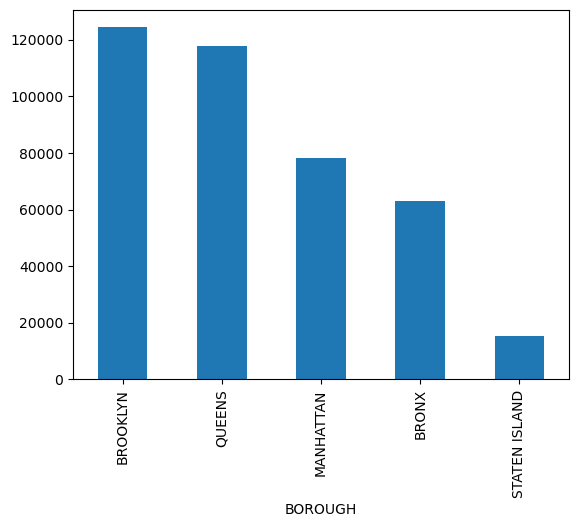

In [49]:
# Split into boroughs and describe
MVC_Brooklyn = MVC[MVC["BOROUGH"] == "BROOKLYN"]
MVC_Manhattan = MVC[MVC["BOROUGH"] == "MANHATTAN"]
MVC_Queens = MVC[MVC["BOROUGH"] == "QUEENS"]
MVC_Bronx = MVC[MVC["BOROUGH"] == "BRONX"]
MVC_StatenIsland = MVC[MVC["BOROUGH"] == "STATEN ISLAND"]

MVC["BOROUGH"].value_counts().plot.bar()

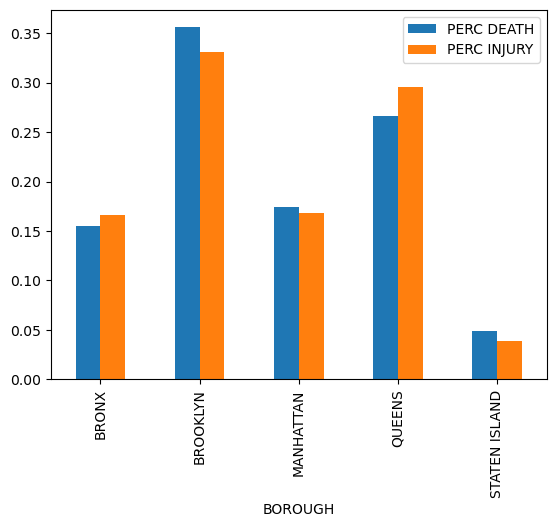

In [155]:
# Bar graph comparing deaths and injuries in boroughs

# fig, axs = plt.subplots(1, 3, figsize=(25, 5))
MVC_HasDeath = MVC[MVC["HAS DEATH"] == 1]
MVC_HasInjury = MVC[MVC["HAS INJURY"] == 1]

Borough_DeathPerc = MVC_HasDeath.groupby("BOROUGH")["HAS DEATH"].count() / len(
    MVC_HasDeath
)
Borough_InjuryPerc = MVC_HasInjury.groupby("BOROUGH")["HAS INJURY"].count() / len(
    MVC_HasInjury
)
Borough_Names = list(MVC_HasInjury.groupby("BOROUGH")["HAS INJURY"].count().index)

Borough_InjuryDeathPerc = pd.DataFrame(
    {
        "BOROUGH": Borough_Names,
        "PERC DEATH": Borough_DeathPerc,
        "PERC INJURY": Borough_InjuryPerc,
    }
)

Borough_InjuryDeathPerc.plot(x="BOROUGH", y=["PERC DEATH", "PERC INJURY"], kind="bar")
plt.show()

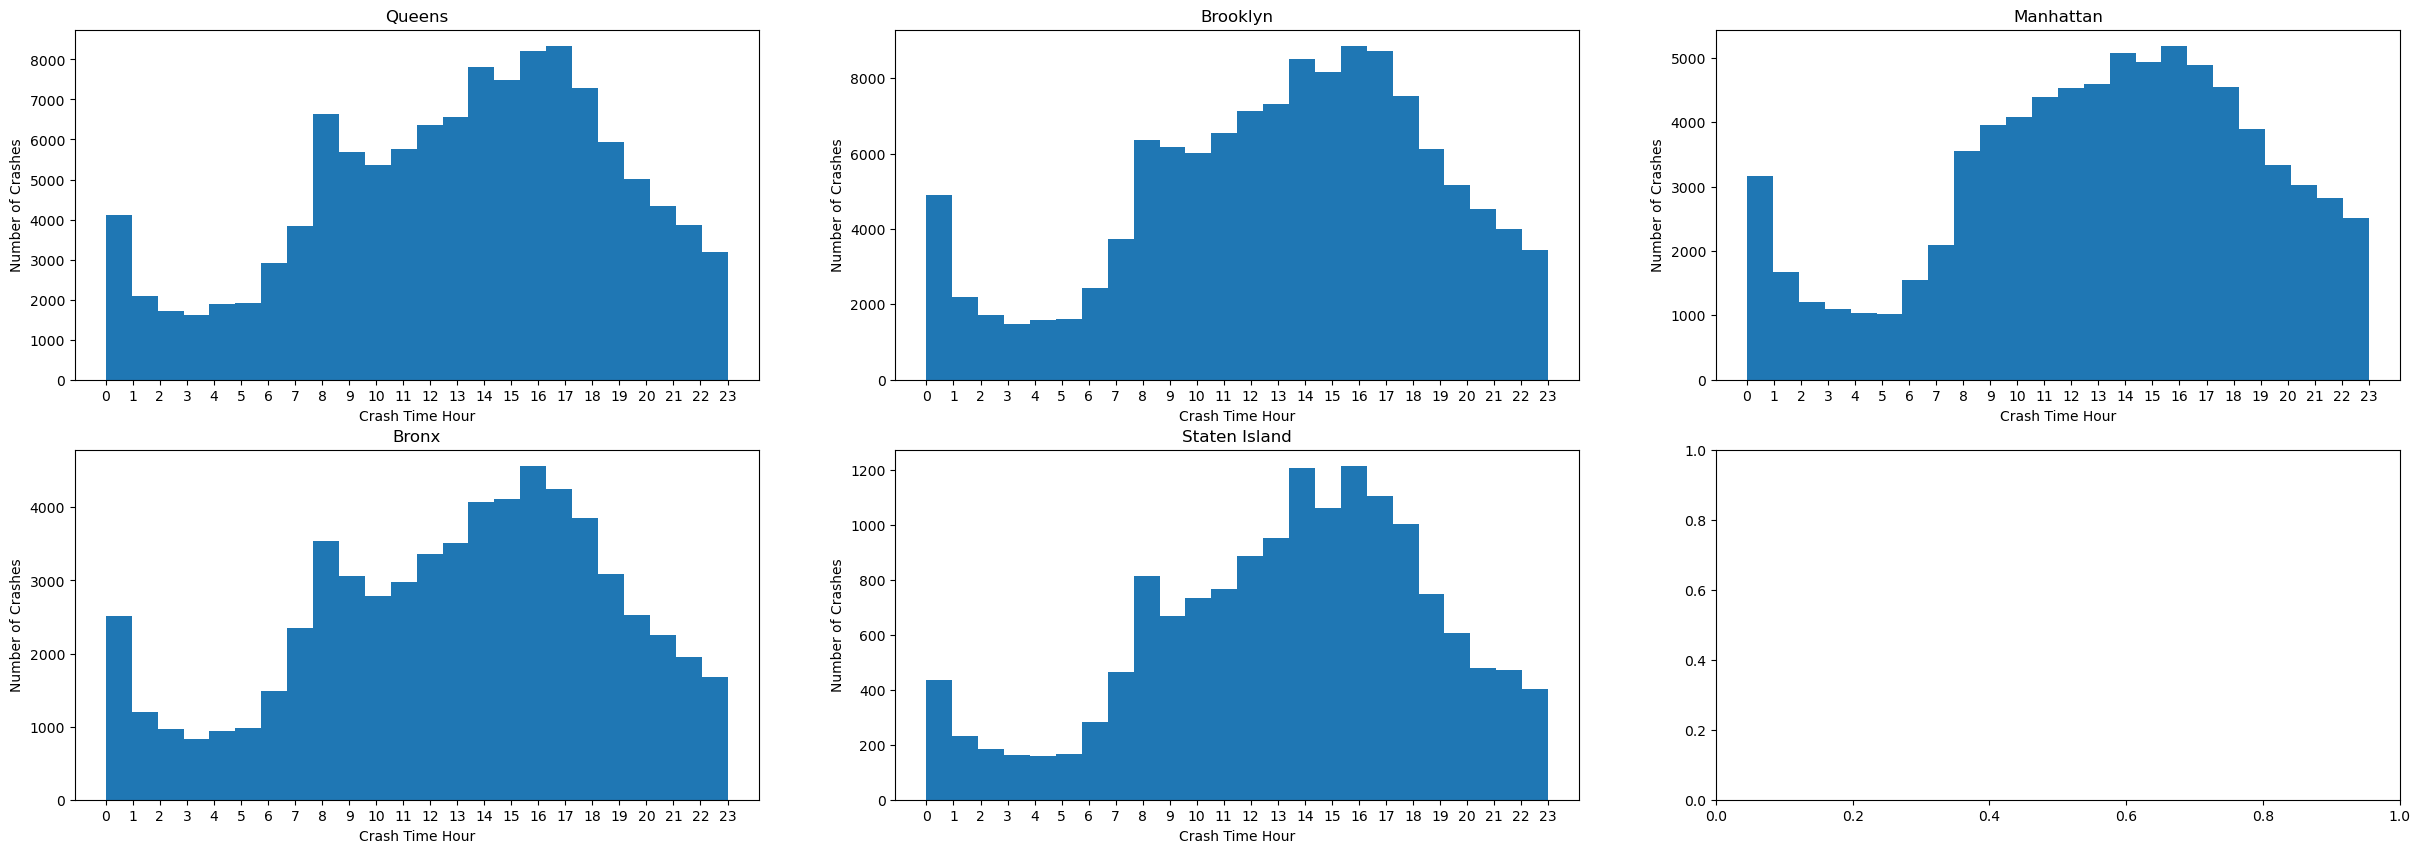

In [50]:
fig, axs = plt.subplots(2, 3, figsize=(30, 10))
axs[0][0].hist(MVC_Queens["CRASH TIME"].dt.hour, bins=24)
axs[0][0].set_xticks(np.arange(0, 24))
axs[0][0].set_xlabel("Crash Time Hour")
axs[0][0].set_ylabel("Number of Crashes")
axs[0][0].set_title("Queens")

axs[0][1].hist(MVC_Brooklyn["CRASH TIME"].dt.hour, bins=24)
axs[0][1].set_xticks(np.arange(0, 24))
axs[0][1].set_xlabel("Crash Time Hour")
axs[0][1].set_ylabel("Number of Crashes")
axs[0][1].set_title("Brooklyn")

axs[0][2].hist(MVC_Manhattan["CRASH TIME"].dt.hour, bins=24)
axs[0][2].set_xticks(np.arange(0, 24))
axs[0][2].set_xlabel("Crash Time Hour")
axs[0][2].set_ylabel("Number of Crashes")
axs[0][2].set_title("Manhattan")

axs[1][0].hist(MVC_Bronx["CRASH TIME"].dt.hour, bins=24)
axs[1][0].set_xticks(np.arange(0, 24))
axs[1][0].set_xlabel("Crash Time Hour")
axs[1][0].set_ylabel("Number of Crashes")
axs[1][0].set_title("Bronx")

axs[1][1].hist(MVC_StatenIsland["CRASH TIME"].dt.hour, bins=24)
axs[1][1].set_xticks(np.arange(0, 24))
axs[1][1].set_xlabel("Crash Time Hour")
axs[1][1].set_ylabel("Number of Crashes")
axs[1][1].set_title("Staten Island")
plt.show()

In [112]:
# Analyze mean crash time

print("Mean times for accident in different boroughs")
boroughnames = MVC.groupby("BOROUGH")["CRASH TIME"].mean().index
count = 0
for item in MVC.groupby("BOROUGH")["CRASH TIME"].mean():
    print("{} -> {}:{}".format(boroughnames[count], item.hour, item.minute))
    count += 1

Mean times for accident in different boroughs
BRONX -> 13:22
BROOKLYN -> 13:33
MANHATTAN -> 13:32
QUEENS -> 13:29
STATEN ISLAND -> 13:48


[Text(0.5, 1.0, 'Staten Island')]

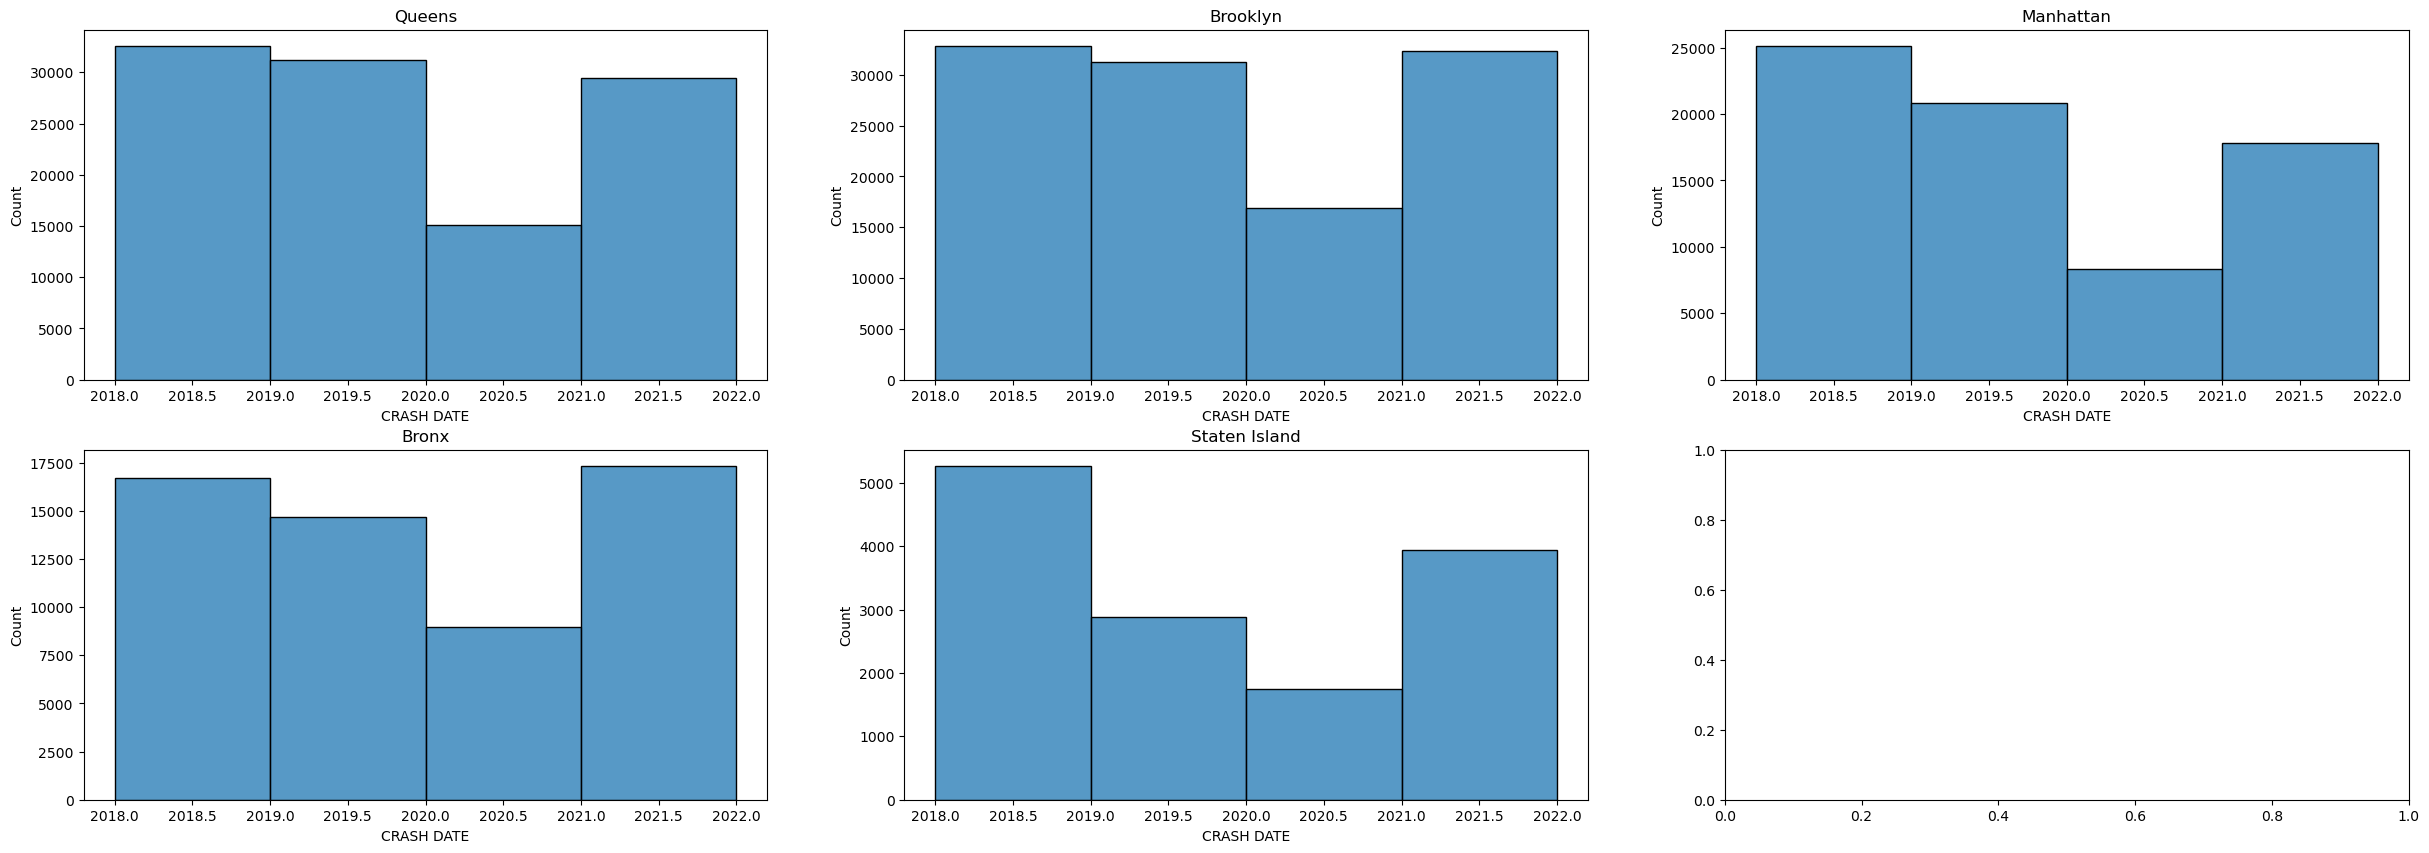

In [51]:
fig, axs = plt.subplots(2, 3, figsize=(30, 10))

sns.histplot(
    MVC_Queens["CRASH DATE"].dt.year,
    bins=range(
        min(MVC_Queens["CRASH DATE"].dt.year), max(MVC_Queens["CRASH DATE"].dt.year)
    ),
    ax=axs[0][0],
).set(title="Queens")

sns.histplot(
    MVC_Brooklyn["CRASH DATE"].dt.year,
    bins=range(
        min(MVC_Brooklyn["CRASH DATE"].dt.year), max(MVC_Brooklyn["CRASH DATE"].dt.year)
    ),
    ax=axs[0][1],
).set(title="Brooklyn")

sns.histplot(
    MVC_Manhattan["CRASH DATE"].dt.year,
    bins=range(
        min(MVC_Manhattan["CRASH DATE"].dt.year),
        max(MVC_Manhattan["CRASH DATE"].dt.year),
    ),
    ax=axs[0][2],
).set(title="Manhattan")

sns.histplot(
    MVC_Bronx["CRASH DATE"].dt.year,
    bins=range(
        min(MVC_Bronx["CRASH DATE"].dt.year), max(MVC_Bronx["CRASH DATE"].dt.year)
    ),
    ax=axs[1][0],
).set(title="Bronx")

sns.histplot(
    MVC_StatenIsland["CRASH DATE"].dt.year,
    bins=range(
        min(MVC_StatenIsland["CRASH DATE"].dt.year),
        max(MVC_StatenIsland["CRASH DATE"].dt.year),
    ),
    ax=axs[1][1],
).set(title="Staten Island")

Text(0.5, 1.0, 'Staten Island')

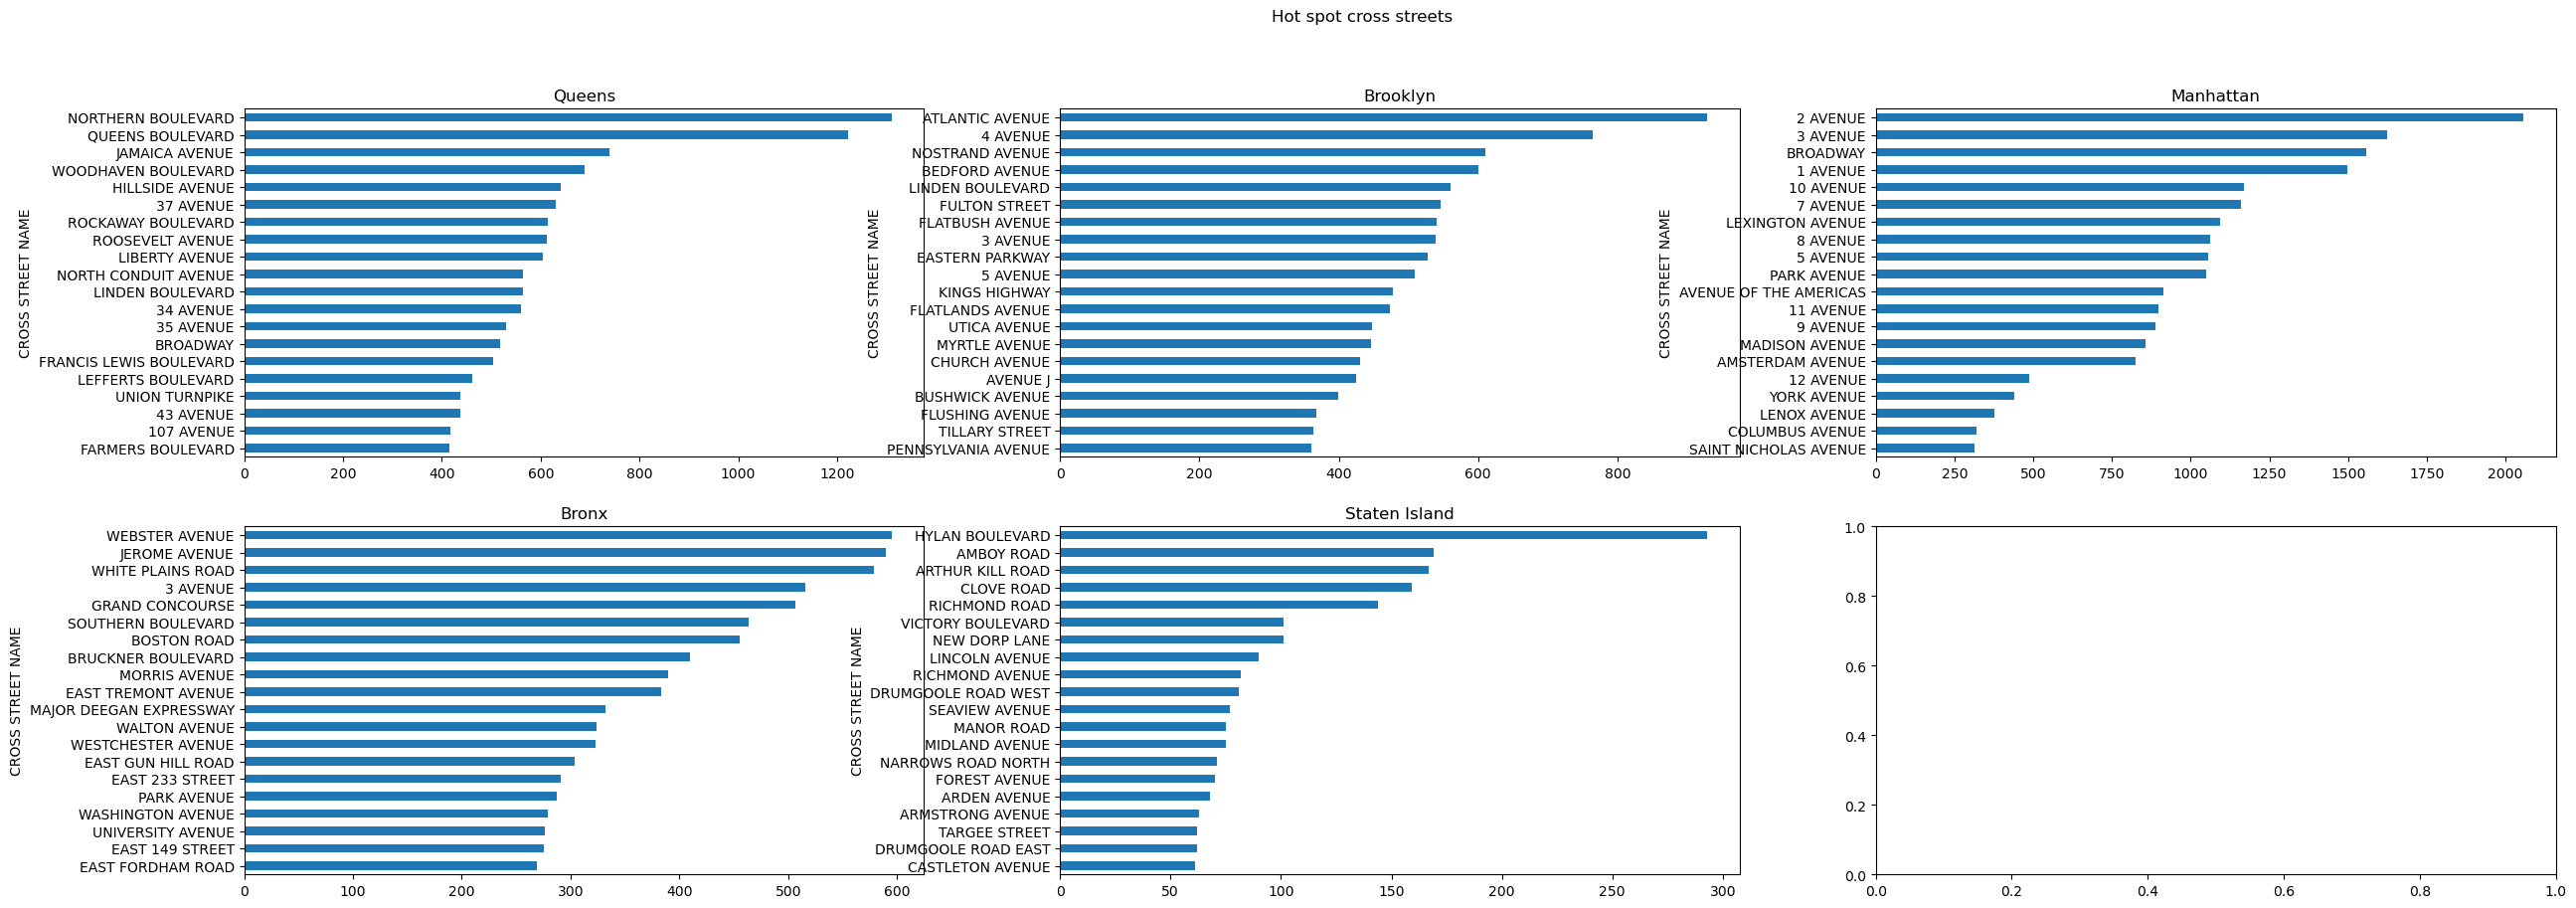

In [52]:
# Check if there are hotspots
fig, axs = plt.subplots(2, 3, figsize=(30, 10))
fig.suptitle("Hot spot cross streets")

MVC_Queens["CROSS STREET NAME"].value_counts()[:20].sort_values(ascending=True).plot(
    kind="barh", ax=axs[0][0]
)
axs[0][0].set_title("Queens")

MVC_Brooklyn["CROSS STREET NAME"].value_counts()[:20].sort_values(ascending=True).plot(
    kind="barh", ax=axs[0][1]
)
axs[0][1].set_title("Brooklyn")

MVC_Manhattan["CROSS STREET NAME"].value_counts()[:20].sort_values(ascending=True).plot(
    kind="barh", ax=axs[0][2]
)
axs[0][2].set_title("Manhattan")

MVC_Bronx["CROSS STREET NAME"].value_counts()[:20].sort_values(ascending=True).plot(
    kind="barh", ax=axs[1][0]
)
axs[1][0].set_title("Bronx")

MVC_StatenIsland["CROSS STREET NAME"].value_counts()[:20].sort_values(
    ascending=True
).plot(kind="barh", ax=axs[1][1])
axs[1][1].set_title("Staten Island")

Text(0.5, 1.0, 'Staten Island')

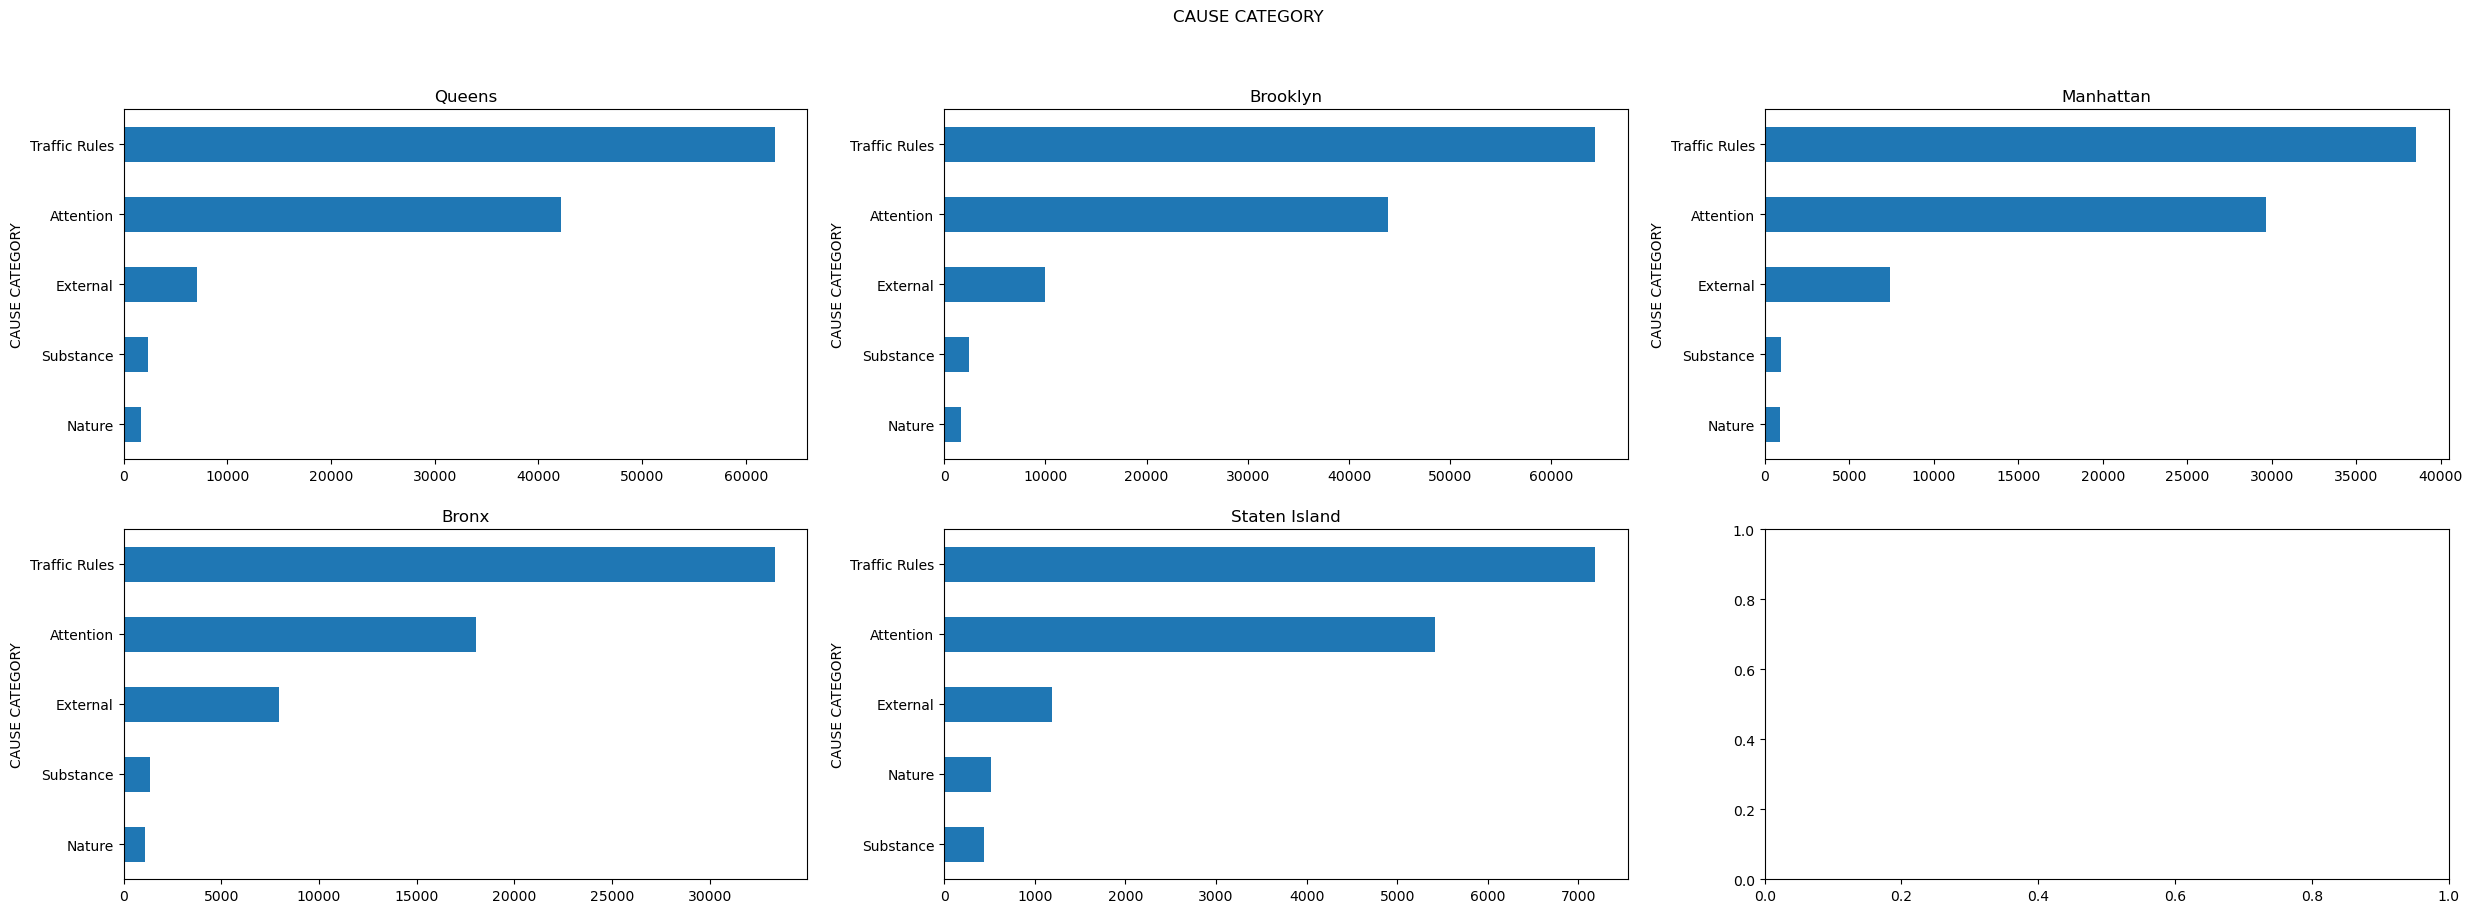

In [53]:
# Top 5 Vehicle 1 Crash Reason


fig, axs = plt.subplots(2, 3, figsize=(30, 10))
fig.suptitle("CAUSE CATEGORY")

MVC_Queens["CAUSE CATEGORY"].value_counts()[:5].sort_values(ascending=True).plot(
    kind="barh", ax=axs[0][0]
)
axs[0][0].set_title("Queens")

MVC_Brooklyn["CAUSE CATEGORY"].value_counts()[:5].sort_values(ascending=True).plot(
    kind="barh", ax=axs[0][1]
)
axs[0][1].set_title("Brooklyn")

MVC_Manhattan["CAUSE CATEGORY"].value_counts()[:5].sort_values(ascending=True).plot(
    kind="barh", ax=axs[0][2]
)
axs[0][2].set_title("Manhattan")

MVC_Bronx["CAUSE CATEGORY"].value_counts()[:5].sort_values(ascending=True).plot(
    kind="barh", ax=axs[1][0]
)
axs[1][0].set_title("Bronx")

MVC_StatenIsland["CAUSE CATEGORY"].value_counts()[:5].sort_values(ascending=True).plot(
    kind="barh", ax=axs[1][1]
)
axs[1][1].set_title("Staten Island")

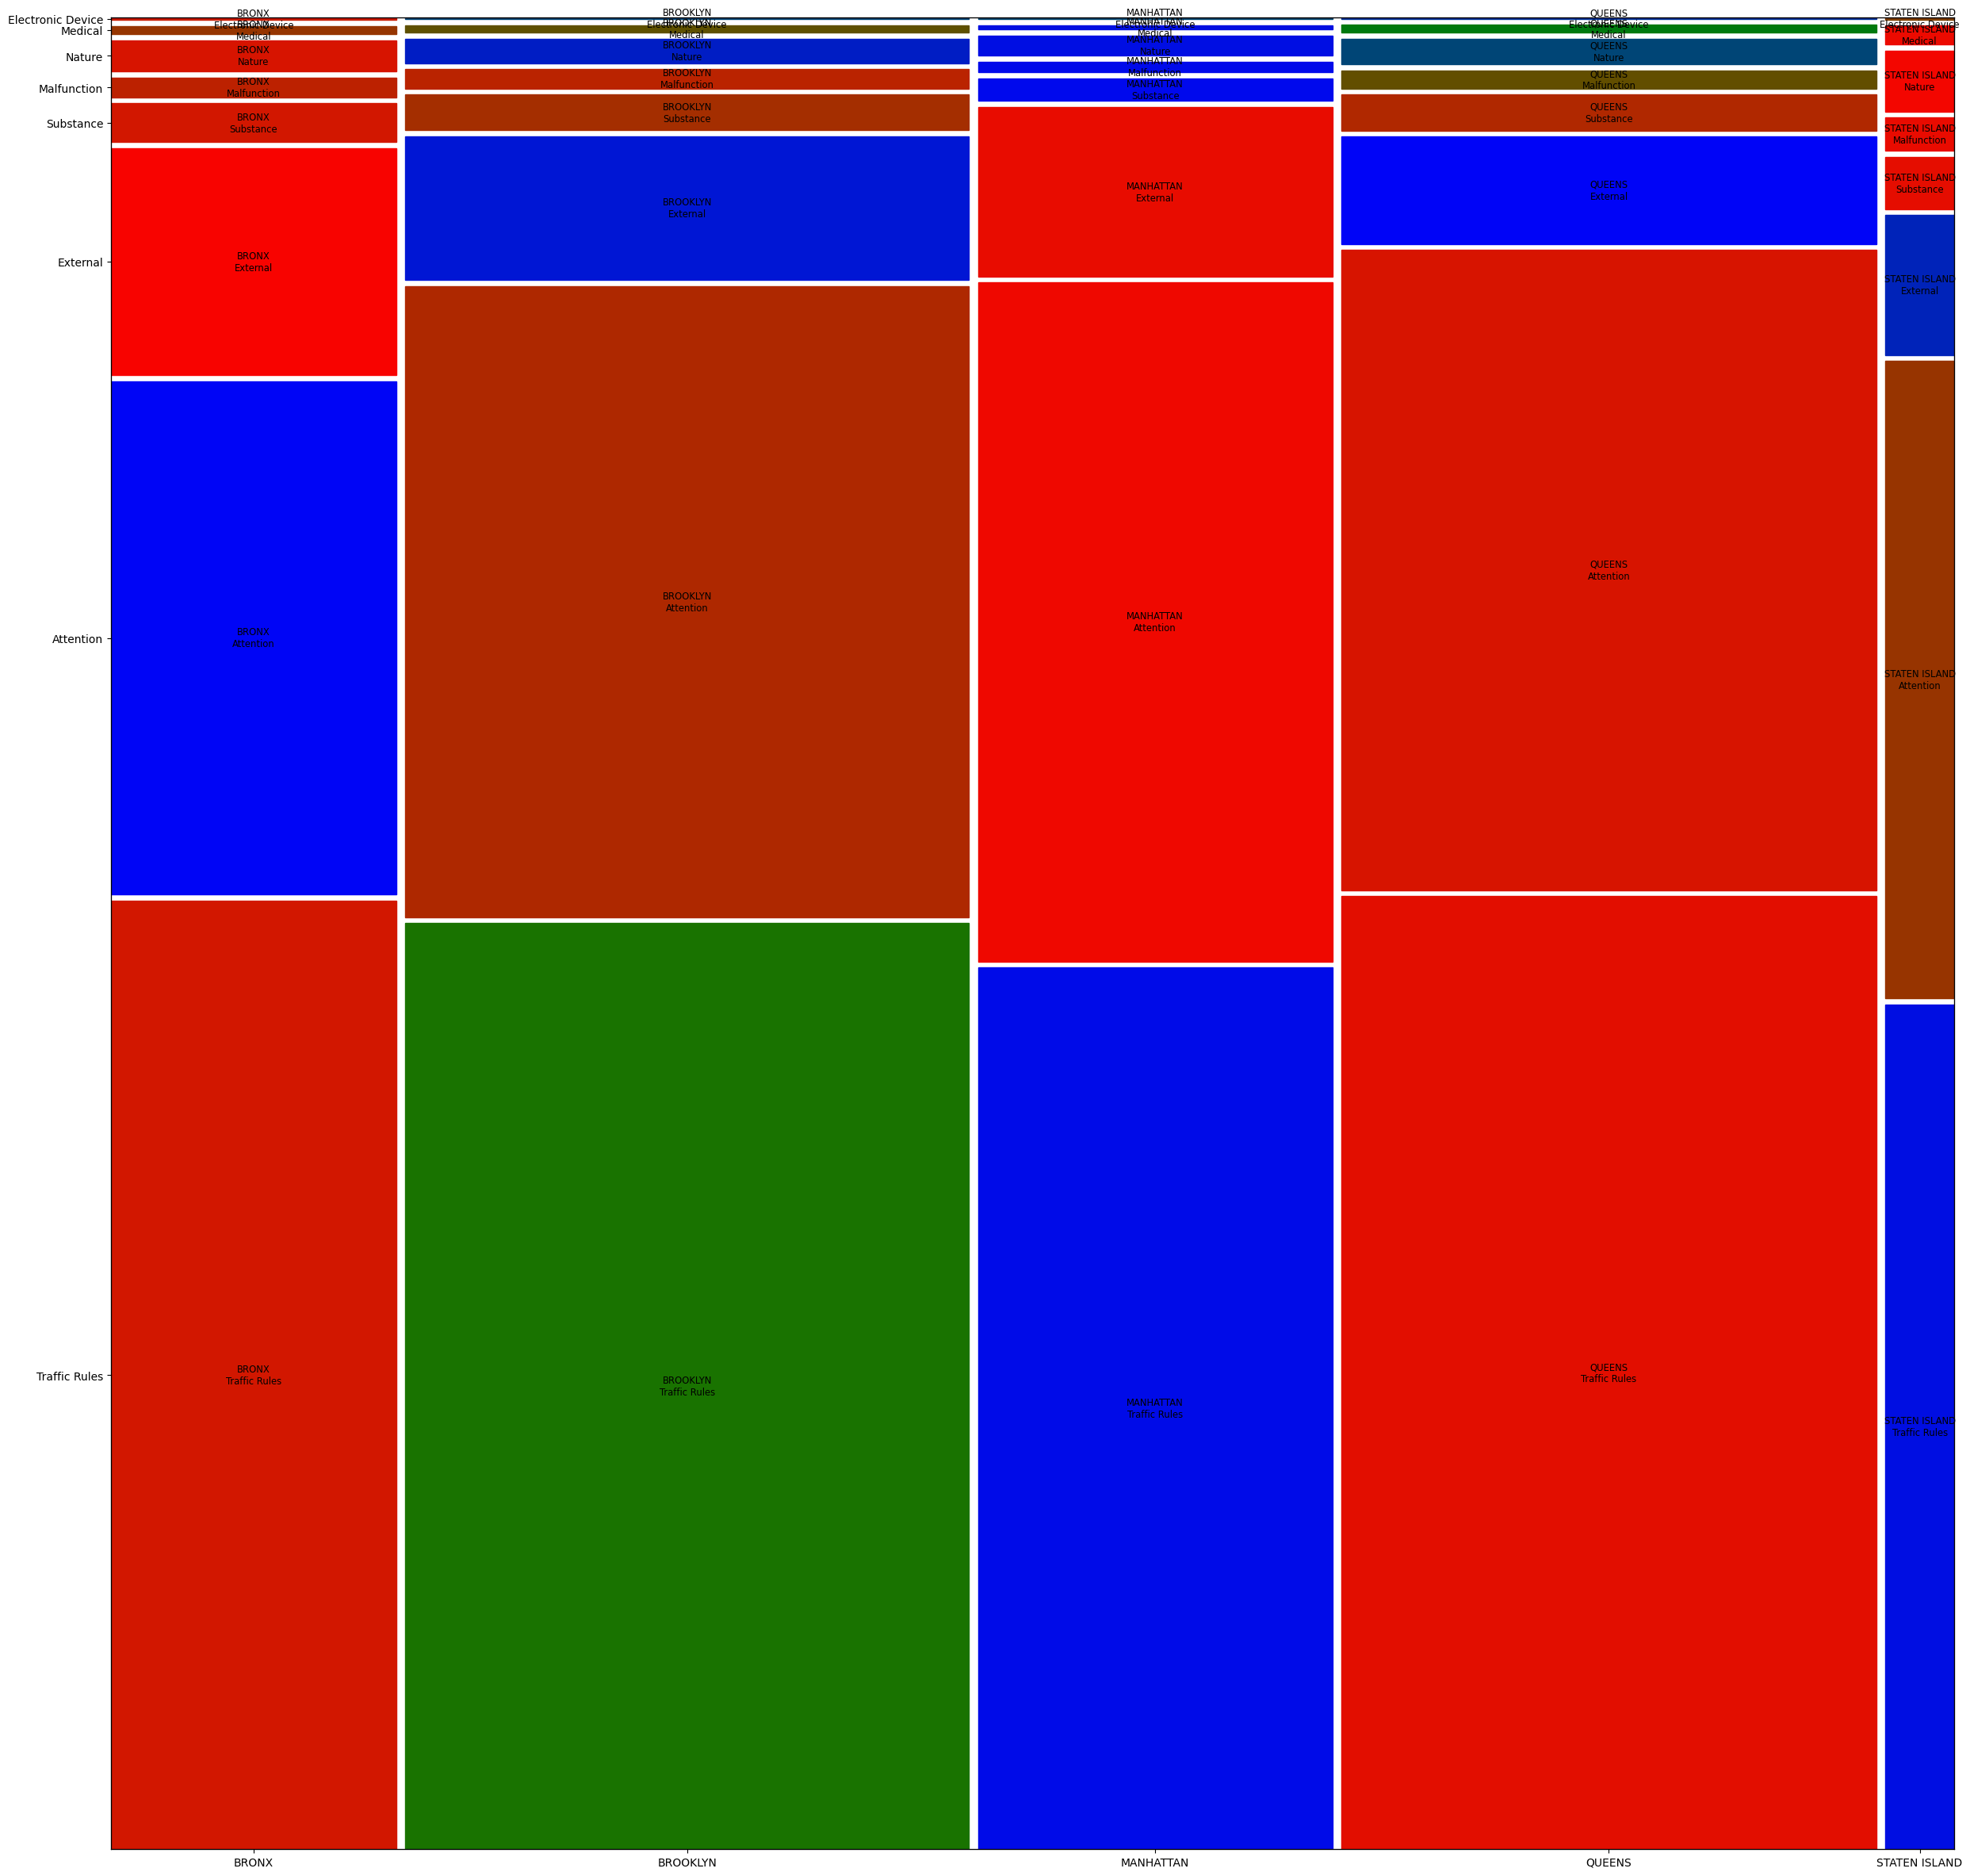

In [54]:
MVC_Copy = MVC.copy()

from statsmodels.graphics.mosaicplot import mosaic

fig, axs = plt.subplots(1, 1, figsize=(30, 30))
mosaic(
    MVC.sort_values("BOROUGH"), ["BOROUGH", "CAUSE CATEGORY"], statistic=True, ax=axs
)
plt.show()

In [55]:
# Check for residuals and mosaic

import numpy as np
import pandas as pd
import statsmodels.api as sm

table = pd.crosstab(MVC["CAUSE CATEGORY"], MVC["BOROUGH"], margins=False)
table = sm.stats.Table(table)

display(table.standardized_resids)
display(MVC.groupby("BOROUGH")["CAUSE CATEGORY"].value_counts())

X2 = table.test_nominal_association()
print(X2)

BOROUGH,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
CAUSE CATEGORY,,,,,
Attention,-35.649317,3.034828,19.775533,7.418364,1.817908
Electronic Device,3.958587,-1.025027,-0.875435,-1.789654,1.025061
External,41.674917,-6.044783,11.526075,-36.000555,-2.799204
Malfunction,3.094988,3.232336,-12.644430,0.751412,10.712389
Medical,1.553823,0.710481,-8.152553,-0.068878,12.384519
Nature,5.860425,-4.038809,-9.191521,-1.024250,20.101701
Substance,5.117649,2.185741,-14.769890,2.661163,9.252041
Traffic Rules,6.941588,0.171033,-15.376586,12.442796,-11.382419


BOROUGH        CAUSE CATEGORY   
BRONX          Traffic Rules        33322
               Attention            18044
               External              7979
               Substance             1362
               Nature                1096
               Malfunction            702
               Medical                290
               Electronic Device       82
BROOKLYN       Traffic Rules        64338
               Attention            43837
               External             10012
               Substance             2462
               Nature                1702
               Malfunction           1342
               Medical                541
               Electronic Device      100
MANHATTAN      Traffic Rules        38535
               Attention            29677
               External              7412
               Substance              987
               Nature                 882
               Malfunction            469
               Medical                199
 

df          28
pvalue      0.0
statistic   4703.940097473299


In [56]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

success_count = np.array(
    [
        len(MVC_Manhattan[MVC_Manhattan["CAUSE CATEGORY"] == "Traffic Rules"]),
        len(MVC[MVC["CAUSE CATEGORY"] == "Traffic Rules"]),
    ]
)  # success counts
sample_sizes = np.array([len(MVC_Manhattan), len(MVC)])  # sample sizes
stat, pval = proportions_ztest(success_count, sample_sizes)

print("{0:0.4f},".format(stat), "{0:0.8f}".format(pval))
print(
    f"Delta in Traffic Rules Accidents in Manhattan = {(len(MVC_Manhattan[MVC_Manhattan['CAUSE CATEGORY'] == 'Traffic Rules'])/len(MVC_Manhattan)) - (len(MVC[MVC['CAUSE CATEGORY'] == 'Traffic Rules'])/len(MVC))}\n"
)

success_count = np.array(
    [
        len(MVC_Bronx[MVC_Bronx["CAUSE CATEGORY"] == "Traffic Rules"]),
        len(MVC[MVC["CAUSE CATEGORY"] == "Traffic Rules"]),
    ]
)  # success counts
sample_sizes = np.array([len(MVC_Bronx), len(MVC)])  # sample sizes
stat, pval = proportions_ztest(success_count, sample_sizes)

print("{0:0.4f},".format(stat), "{0:0.8f}".format(pval))
print(
    f"Delta in Traffic Rules Accidents in Bronx = {(len(MVC_Bronx[MVC_Bronx['CAUSE CATEGORY'] == 'Traffic Rules'])/len(MVC_Bronx)) - (len(MVC[MVC['CAUSE CATEGORY'] == 'Traffic Rules'])/len(MVC))}"
)

-12.6009, 0.00000000
Delta in Traffic Rules Accidents in Manhattan = -0.02462993490655052

5.9214, 0.00000000
Delta in Traffic Rules Accidents in Bronx = 0.01269532979439425


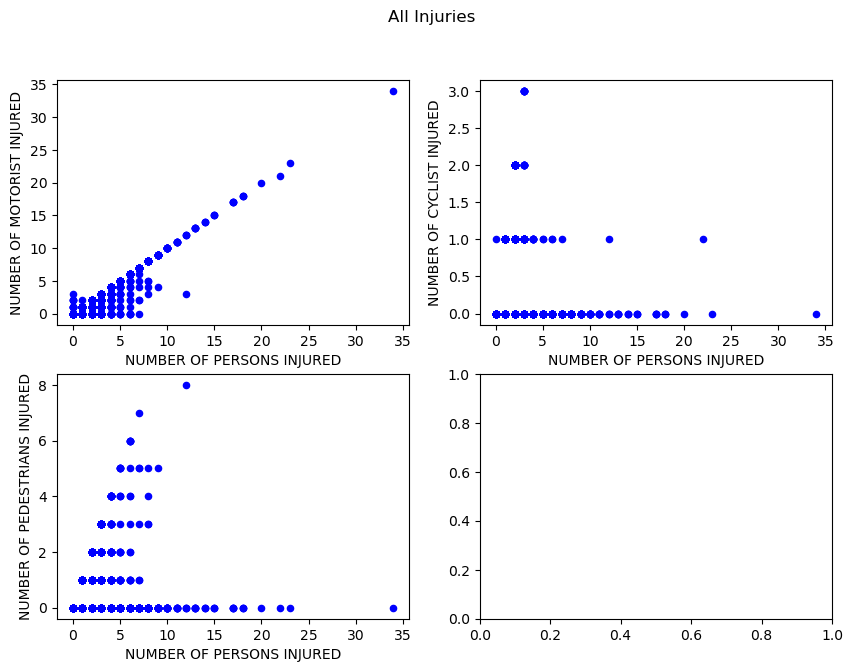

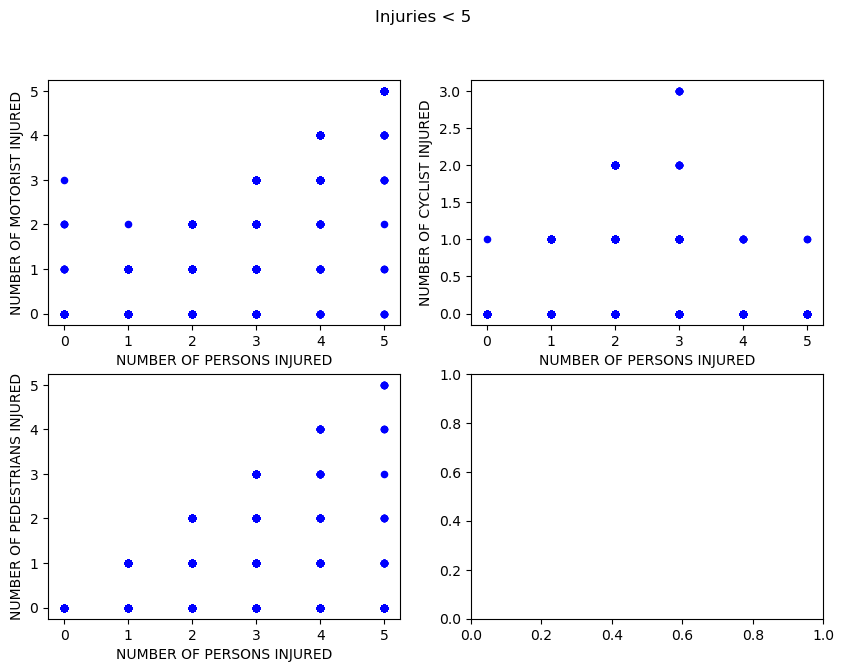

In [57]:
fig, ax = plt.subplots(2, 2)
MVC_Copy = MVC.copy()

MVC_Copy.plot(
    kind="scatter",
    y="NUMBER OF MOTORIST INJURED",
    x="NUMBER OF PERSONS INJURED",
    color="blue",
    figsize=(10, 7),
    ax=ax[0][0],
)
MVC_Copy.plot(
    kind="scatter",
    y="NUMBER OF PEDESTRIANS INJURED",
    x="NUMBER OF PERSONS INJURED",
    color="blue",
    figsize=(10, 7),
    ax=ax[1][0],
)
MVC_Copy.plot(
    kind="scatter",
    y="NUMBER OF CYCLIST INJURED",
    x="NUMBER OF PERSONS INJURED",
    color="blue",
    figsize=(10, 7),
    ax=ax[0][1],
)
fig.suptitle("All Injuries")
plt.show()

fig, ax = plt.subplots(2, 2)
MVC_Copy = MVC.copy()
MVC_Copy = MVC_Copy[MVC_Copy["NUMBER OF PERSONS INJURED"] <= 5]

MVC_Copy.plot(
    kind="scatter",
    y="NUMBER OF MOTORIST INJURED",
    x="NUMBER OF PERSONS INJURED",
    color="blue",
    figsize=(10, 7),
    ax=ax[0][0],
)
MVC_Copy.plot(
    kind="scatter",
    y="NUMBER OF PEDESTRIANS INJURED",
    x="NUMBER OF PERSONS INJURED",
    color="blue",
    figsize=(10, 7),
    ax=ax[1][0],
)
MVC_Copy.plot(
    kind="scatter",
    y="NUMBER OF CYCLIST INJURED",
    x="NUMBER OF PERSONS INJURED",
    color="blue",
    figsize=(10, 7),
    ax=ax[0][1],
)
fig.suptitle("Injuries < 5")
plt.show()

# Experiments

In [71]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

MVC_BoroughDummies = pd.get_dummies(MVC, columns=["BOROUGH"], dtype="int8")

MVC_BoroughDummies.columns
fitInjury = smf.glm(
    formula='Q("HAS INJURY") ~ C(Q("DAY OF WEEK")) + Q("CRASH HOUR") + BOROUGH_BRONX + BOROUGH_BROOKLYN + BOROUGH_MANHATTAN + BOROUGH_QUEENS + Q("BOROUGH_STATEN ISLAND")',
    data=MVC_BoroughDummies,
    family=sm.families.Binomial(link=sm.families.links.Logit()),
).fit()
print(fitInjury.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        Q("HAS INJURY")   No. Observations:               398581
Model:                            GLM   Df Residuals:                   398569
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.3571e+05
Date:                Sun, 15 Oct 2023   Deviance:                   4.7141e+05
Time:                        23:12:50   Pearson chi2:                 3.99e+05
No. Iterations:                   100   Pseudo R-squ. (CS):           0.004295
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [ ]:
MVC.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'DAY OF WEEK', 'HAS DEATH', 'HAS INJURY', 'CRASH HOUR',
       'CAUSE CATEGORY'],
      dtype='object')